In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('Global_Superstore2.csv', encoding='latin1')
print(df)


       Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Cons

In [3]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [5]:
df = df.assign(
    Sales=df['Sales'].fillna(df['Sales'].mean()),
    Region=df['Region'].fillna('Unknown')
)



In [7]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool

In [8]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Profit'] >= Q1 - 1.5 * IQR) & (df['Profit'] <= Q3 + 1.5 * IQR)]


In [9]:
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,41535.000000,8548.000000,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000
mean,25796.098688,55905.728124,123.747969,3.206091,0.129872,13.228016,13.331655
std,14919.222019,32084.099790,204.171704,2.095874,0.201619,25.720023,26.304503
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-55.125000,0.000000
25%,12676.500000,23666.000000,24.900000,2.000000,0.000000,0.644700,2.060000
50%,26129.000000,60423.000000,58.240000,3.000000,0.000000,7.980000,5.450000
75%,38742.500000,90032.000000,142.740000,4.000000,0.200000,24.060000,13.970000
max,51290.000000,99301.000000,5759.964000,14.000000,0.800000,91.995400,846.540000


In [15]:
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_df.corr()  # Compute the correlation matrix


In [18]:
print(correlation_matrix)


                 Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.015024 -0.073371 -0.188586  0.073459 -0.034278   
Postal Code    0.015024     1.000000  0.054413  0.027585  0.049748 -0.010069   
Sales         -0.073371     0.054413  1.000000  0.255876 -0.118902  0.321367   
Quantity      -0.188586     0.027585  0.255876  1.000000 -0.031131  0.163768   
Discount       0.073459     0.049748 -0.118902 -0.031131  1.000000 -0.511515   
Profit        -0.034278    -0.010069  0.321367  0.163768 -0.511515  1.000000   
Shipping Cost -0.056534     0.041204  0.802684  0.209826 -0.099410  0.268333   

               Shipping Cost  
Row ID             -0.056534  
Postal Code         0.041204  
Sales               0.802684  
Quantity            0.209826  
Discount           -0.099410  
Profit              0.268333  
Shipping Cost       1.000000  


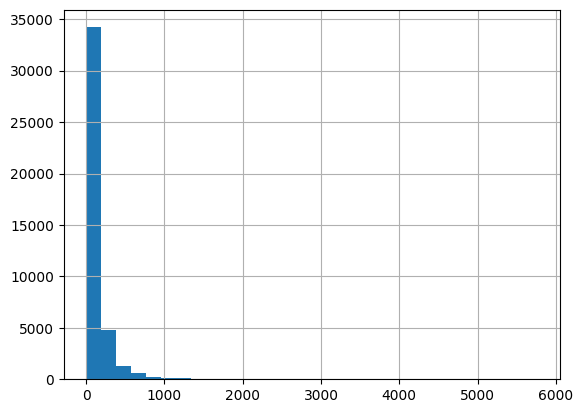

In [11]:
import matplotlib.pyplot as plt
df['Sales'].hist(bins=30)
plt.show()


<Axes: xlabel='Region', ylabel='Profit'>

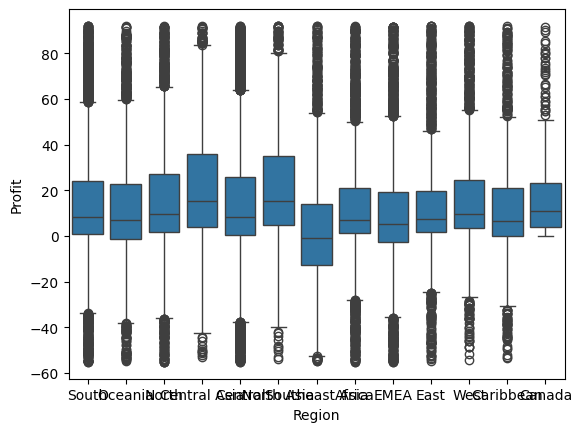

In [12]:
import seaborn as sns
sns.boxplot(x=df['Region'], y=df['Profit'])


<Axes: >

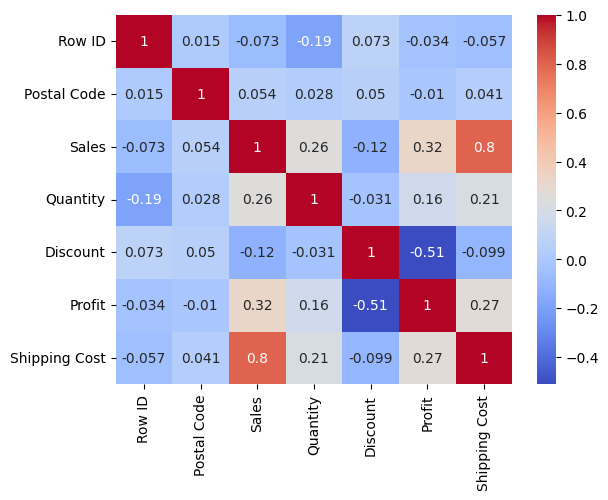

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


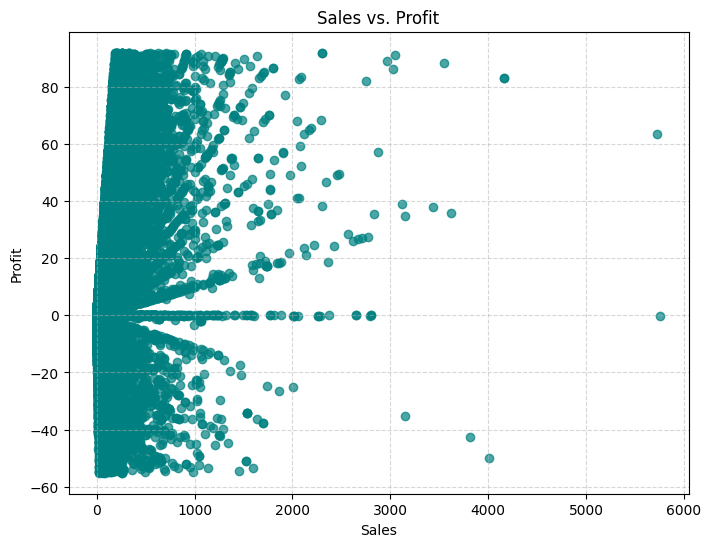

In [19]:
# Scatter plot between Sales and Profit
plt.figure(figsize=(8, 6))
plt.scatter(df['Sales'], df['Profit'], alpha=0.7, color='teal')
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
